# Food.com Exploratory Data Analysis

In this analysis, we are performing exploratory data analytics and predictive modelling to solve some business needs we identified in Food.com and also solutions that are helpful to their customers.

We are using data from the following kaggle project:https://www.aclweb.org/anthology/attachments/D19-1613.Attachment.pdf

Food.com is a place where you can find recipies for all ocassions. It is a social networking platform for people who like to try new recipes and people who like to make new recipes.

The website has a lot of features that attract people and retain them. There are sections where you can find ratings and reviews for the recipes which makes it perferct for people to double-check that is the recipe they want.

The data from kaggle website has Recipes, Interactions and User information. We are only considering Recipes and Interactions for our analysis. Interations being the reviews and ratings posted for each recipe.

# Data Exploration 

In [1]:
from DataExploration import read_all_files
rawData1,review_data=read_all_files()


Reading the reciepies data: 
List of columns:  ['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients']
Number of columns:  12
Reading the reviews data: 
List of columns:  ['user_id', 'recipe_id', 'date', 'rating', 'review']
Number of columns:  5
Column data types for Recipie data
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object
Column data types for Review data
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object
Number of total recipes:  231637
Number of contributors:  27926
Total number of reviews:  1132367
Total number of contributors:  226570


In [2]:
from DataExploration import recombine_review_with_recipie
rawData_final=recombine_review_with_recipie(rawData1,review_data)


Summarize the interactions data based on recipe_id, so that we might have the mean rating for each recipe and also the number of reviews posted for each recipe.
           mean_rating  review_count
recipe_id                           
38            4.250000             4
39            3.000000             1
40            4.333333             9
41            4.500000             2
43            1.000000             1
Index(['name', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'id_copy', 'mean_rating', 'review_count'],
      dtype='object')


### Performing clamping technique to remove outlier
The above boxplots represent the distributions of the numeric features in our data. In all of the features there are few extreme values that are completely skewing the distributions. Such values can be called as outliers.

We will need to handle these outliers before moving forward with our analysis.

We can see outliers in above box plot. But how is the boundary for the outlier is decided (the two horizontal lines which we see before the outliers)? So those values are decided by the the Inter Quartile Range (IQR) which is differenec of first and third quartile. So using that I can set my lower and upper bound as : lower bound = Q1 - 1.5 IQR upper bound = Q3 + 1.5 IQR

Tha values out of these range is considered as outliers and we can remove them. So let's do the same for our data.

In [3]:
from DataExploration import prepocessing
rawData_final=prepocessing(rawData_final)

columns after the strings list ingriedients are converted to ingriedients
printing just the ingriedients
id
137739    ['winter squash', 'mexican seasoning', 'mixed ...
Name: ingredients, dtype: object
Flattening the nutritional values to columns
Column data types for Recipie data
name               object
minutes             int64
contributor_id     object
submitted          object
tags               object
nutrition          object
n_steps             int64
steps              object
description        object
ingredients        object
n_ingredients       int64
id_copy            object
mean_rating       float64
review_count        int64
ingr_str           object
cal               float64
totalFat          float64
sugar             float64
sodium            float64
protein           float64
satFat            float64
carbs             float64
dtype: object


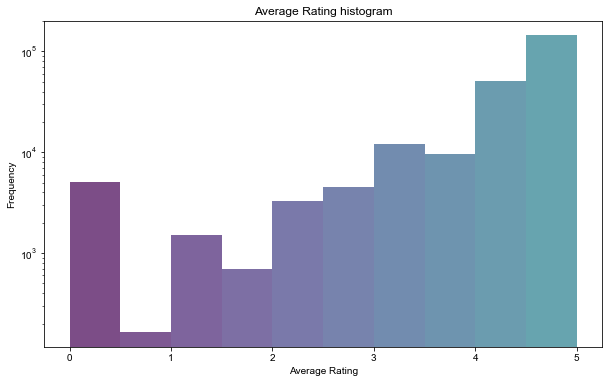

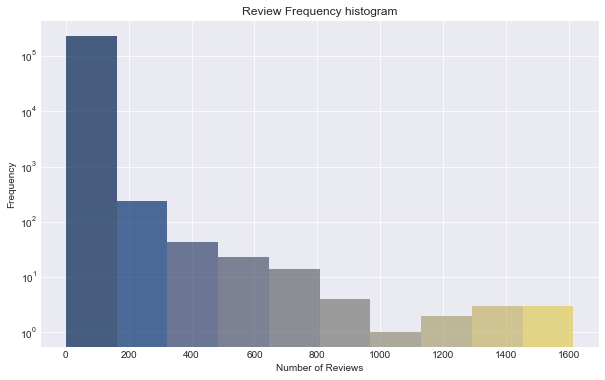

Printing Boxplot to check for data outliers


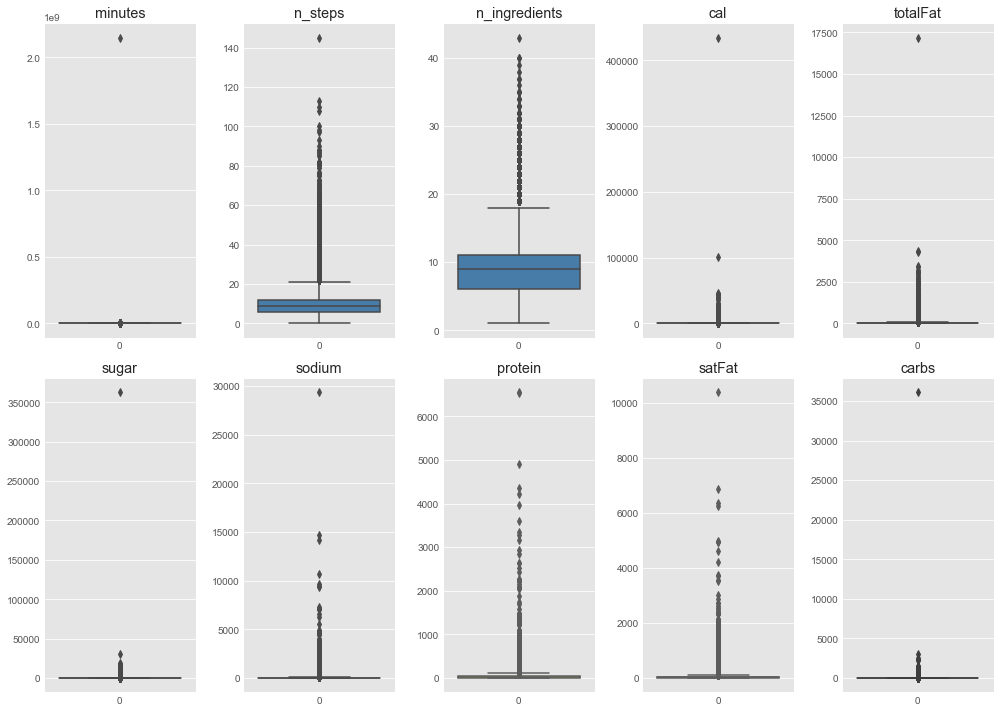

checking if the transformation is applied : 
max of minutes columns BEFORE transformation:  2147483647
max of minutes columns AFTER transformation:  176
Plot for minute data before transformation: 


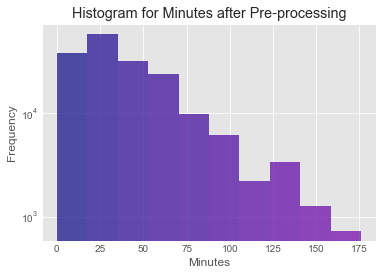

Plot for minute data After transformation: 


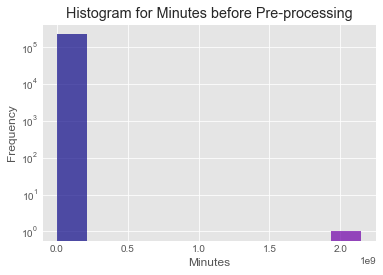

,id,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,mean_rating,review_count,ingr_str,cal,totalFat,sugar,sodium,protein,satFat,carbs
0,137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5.0,3,winter_squash mexican_seasoning mixed_spice ho...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,3.5,4,prepared_pizza_crust sausage_patty eggs milk s...,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,4.0,1,ground_beef yellow_onions diced_tomatoes tomat...,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,4.5,2,spreadable_cheese_with_garlic_and_herbs new_po...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
5,5289,apple a day milk shake,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,...,5.0,2,milk vanilla_ice_cream frozen_apple_juice_conc...,160.2,10.0,55.0,3.0,9.0,20.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,486161,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,...,5.0,6,celery onion green_sweet_pepper garlic_cloves ...,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,493372,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,...,5.0,1,paprika salt garlic_powder onion_powder dried_...,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,308080,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style",...,5.0,5,mayonnaise dijon_mustard tabasco_sauce salt bl...,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,298512,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...",...,1.0,1,butter eagle_brand_condensed_milk light_brown_...,188.0,11.0,57.0,11.0,7.0,21.0,9.0


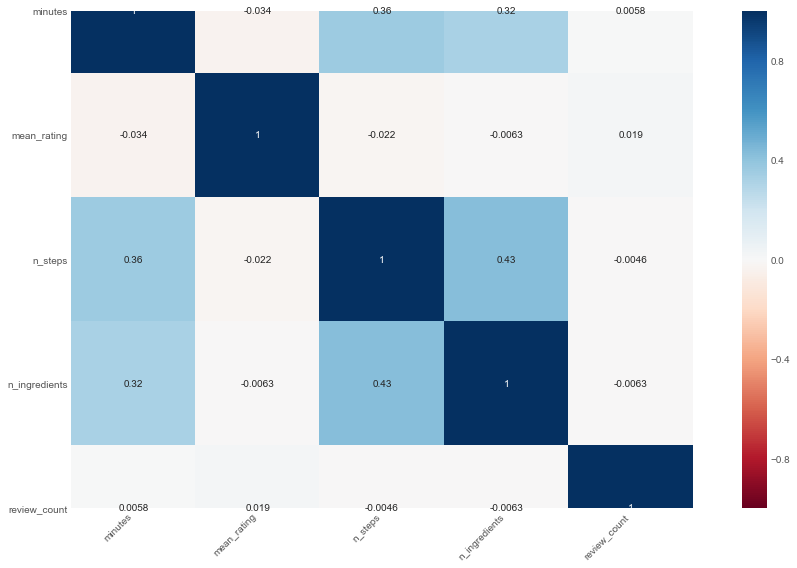

In [4]:
from DataExploration import dataExploration
dataExploration(rawData1,rawData_final)

# Ensemble Model Training 

## So lets start.. 

First we have analysed the data set and we found that ingridents would be the best field in the exsisting dataset to use and leverage and predict cuisine for every recipie. 

Then using one similar dataset where we had ingridients and cuisines we trained our model upto the accuracy of ~75%


## Major steps and strategy 

1. We have 3 files in total which are as follows : 
    * Train.json : this is with ingridients and cuisines 
    * Test.json : This is with ingridients only
    * RAW_recipes.csv : This is the food.com data set in which we intend to add cuisine for each recipie.
2. So using Train.csv we split this dataset into test and train<br>
3. We apply multiple model and check and get maximum accuracy.(in our case random forest classifier performs best).<br>
4. Having done that we can now proceed on the dummy data set Test.csv this is just an extra step that where we are predicting cuisines from the ingridients and checking manually that every thing is working good before we scale our solution to an entire dataset.<br>
5. After we have predicted cuisine now its time to predict the cuisines of entire data set. so we run the predict function giving tf-idf matrix for the ingridients.<br>
6. Once we have the predictions we can add this column to the main dataframe.<br>



In [5]:
from EnsembleModelTrain import read_data_to_train
train,test,df_R=read_data_to_train()

Reading the train data: 
List of columns:  ['id', 'cuisine', 'ingredients']
Number of columns:  3
Reading the test data: 
List of columns:  ['id', 'ingredients']
Number of columns:  2
Reading the food.com data: 
Reading the reciepies data: 
List of columns:  ['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients']
Number of columns:  12
Reading the reviews data: 
List of columns:  ['user_id', 'recipe_id', 'date', 'rating', 'review']
Number of columns:  5
Column data types for Recipie data
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object
Column data types for Review data
user_id       int64
recipe_id     int64
date         object
rating    

In [14]:
from EnsembleModelTrain import train_the_model
#Set the hyper parameters to tune the Random Forest 
param_grid={'n_estimators': [1,50,100,500]}
vectorizer,grid=train_the_model(train,param_grid)

creating the splits from the train data
TF-IDF Matrix looks like below :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Cuisine looks like below :
 0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object 

training the model from the grid search
best param {'n_estimators': 500}
best score 0.7438324100884544
best estimator RandomForestClassifier(n_estimators=500)
model score :  0.750722815839095
model accuracy :  0.750722815839095
              precision    recall  f1-score   support

     italian       0.90      0.47      0.62        81
     mexican       0.76      0.26      0.38       159
 southern_us       0.79      0.62      0.70       311
      indian       0.72      0.88      0.79       516
     chinese       0.79      0.50      0.61       159
      french       0.59      0.50      0.54       507
cajun_creole     

### Prediction

In [8]:
from EnsembleModelTrain import transfer_learning
df_R=transfer_learning(vectorizer,grid,df_R)
df_R

Using pretrained model to predict the cusine in the food.com data


,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,id_copy,mean_rating,review_count,ingredient_list,cuisine
id,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,137739,5.0,3,"['winter squash', 'mexican seasoning', 'mixed ...",cajun_creole
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,31490,3.5,4,"['prepared pizza crust', 'sausage patty', 'egg...",italian
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,112140,4.0,1,"['ground beef', 'yellow onions', 'diced tomato...",mexican
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,59389,4.5,2,"['spreadable cheese with garlic and herbs', 'n...",greek
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,44061,5.0,1,"['tomato juice', 'apple cider vinegar', 'sugar...",southern_us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,486161,5.0,6,"['celery', 'onion', 'green sweet pepper', 'gar...",brazilian
493372,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,493372,5.0,1,"['paprika', 'salt', 'garlic powder', 'onion po...",cajun_creole
308080,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,308080,5.0,5,"['hard-cooked eggs', 'mayonnaise', 'dijon must...",italian


### Exploration and insights using the Column added.

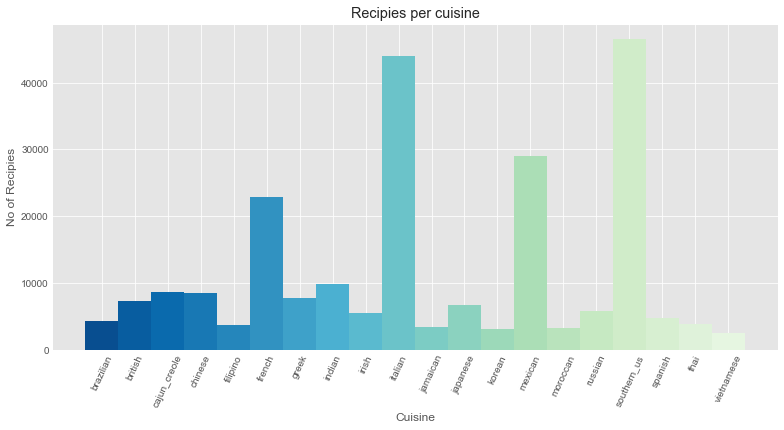

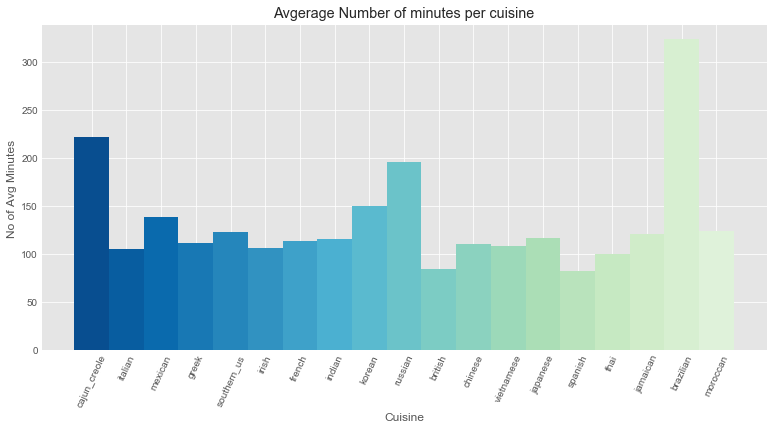

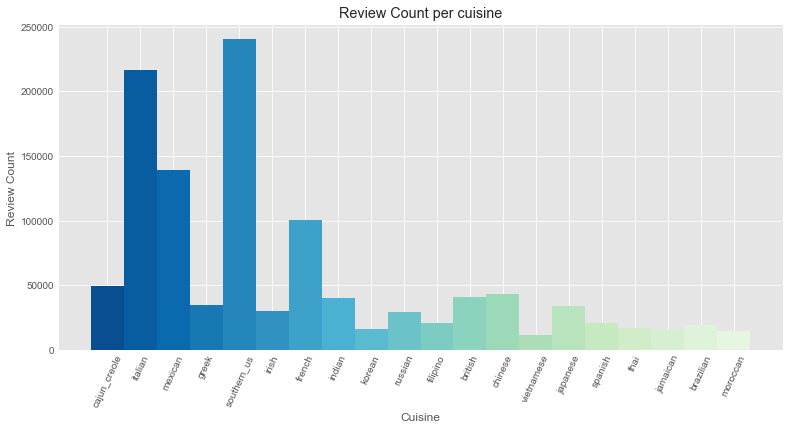

In [11]:
from EnsembleModelTrain import exploration_with_cusisine
exploration_with_cusisine(df_R)

# Market Basket Analysis (Apriori)
As initially informed Food.com provides option to buy ingredients for a receipe in their portal. If we consider ingredients of a receipe are bought together, then we can consider them as items of a order/transaction. Some what like below:

Can you guess what analysis we can do here to increase the items sale?

We can do Market Basket Analysis, which analyzes which items are frequently bought together and hence suggest items to buy based on the items on cart. By implementing this, user can get suggestion more items to add based on what s/he is buying at present.

We are using Apriori algorithm to implement Market Basket Analysis. 
So first like below are creating list of items/ingredients bought together.

In [12]:
from MarketBasketAnalysis import read_data_MBA
Recipies=read_data_MBA()

Reading the food.com data: 
Reading the reciepies data: 
List of columns:  ['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients']
Number of columns:  12
Reading the reviews data: 
List of columns:  ['user_id', 'recipe_id', 'date', 'rating', 'review']
Number of columns:  5
Column data types for Recipie data
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object
Column data types for Review data
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object
Number of total recipes:  231637
Number of contributors:  27926
Total number of reviews:  1132367
Total number of contributors:  226570
Summ

In [13]:
from MarketBasketAnalysis import implement_apriori
implement_apriori(Recipies)



Number of Rules:
113


Example of a rule:
RelationRecord(items=frozenset({'onion powder', 'garlic powder'}), support=0.010045890768745926, ordered_statistics=[OrderedStatistic(items_base=frozenset({'onion powder'}), items_add=frozenset({'garlic powder'}), confidence=0.6496370742601899, lift=13.902437451072394)])



Listing 10 of the rules:

Rule: onion powder --> garlic powder
Support: 0.010045890768745926
Confidence: 0.6496370742601899
Lift: 13.902437451072394
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: baking powder --> all-purpose flour
Support: 0.00518051951976584
Confidence: 0.6685236768802227
Lift: 8.818109386794838
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: baking soda --> all-purpose flour
Support: 0.0051459827229674016
Confidence: 0.6443243243243243
Lift: 8.498909715478248
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: baking soda --> buttermilk
Support: 0.00583671865893618
Confidence: 0.7897196261682243
Lift: 12.996680997991401
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rule: butter --> bakin